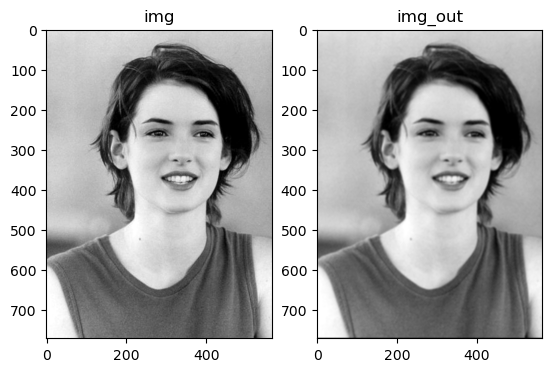

'\n當kernel size變大，圖片會越來越模糊。\n因為卷積核的大小決定了它能夠捕捉到的圖像特徵的範圍。較大的卷積核能夠捕捉到更廣泛的特徵，因此能夠減少圖像的細節和清晰度。\n在這種情況下，將kernel_size從5增加到11會使卷積核捕捉到更大範圍的特徵，因此圖像的清晰度會降低，出現更模糊的效果。\n'

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)
# Enter your code here.

inputs=tf.keras.Input((None,None,1))
kernel_size=5
outputs=Conv2D(1,kernel_size=kernel_size,strides=1,padding='same',name='conv1')(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
weights=np.ones(shape=(kernel_size,kernel_size,1,1))/(kernel_size**2)
bias=np.array([0])
filter_net.get_layer('conv1').set_weights([weights,bias])
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
img_batch=np.expand_dims(img,axis=0)
img_out=filter_net(img_batch)
img_out=np.reshape(img_out,(772,564))
img_out=np.array(img_out,dtype=np.uint8)
fig=plt.figure()
plt.subplot(1,2,1)
plt.title('img')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('img_out')
plt.imshow(img_out, cmap='gray')
plt.show()
#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?
'''
當kernel size變大，圖片會越來越模糊。
因為卷積核的大小決定了它能夠捕捉到的圖像特徵的範圍。較大的卷積核能夠捕捉到更廣泛的特徵，因此能夠減少圖像的細節和清晰度。
在這種情況下，將kernel_size從5增加到11會使卷積核捕捉到更大範圍的特徵，因此圖像的清晰度會降低，出現更模糊的效果。
'''

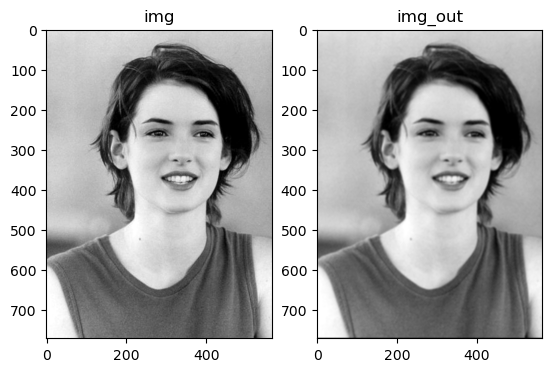

"\n第一段程式碼使用'same' padding，並且直接將輸入圖像放入卷積神經網絡中，沒有進行任何填充。\n意味著卷積核將在圖像的邊緣進行填充，使得輸出圖像的大小與輸入圖像大小相同。\n第二段程式碼使用'valid' padding，並且先對輸入圖像進行了手動填充，然後才將其放入卷積神經網絡中。\n意味著不進行任何填充，而是讓卷積核僅在圖像的有效部分進行卷積。因為已經手動填充了，所以出來的方法2的圖跟方法1一樣。\n"

In [2]:
# Steps 10~13 (15 points)
# Enter your code here.
kernel_size=5
pad=int((kernel_size-1)/2)
img_pad=np.zeros(shape=(img.shape[0]+2*pad,img.shape[1]+2*pad))
img_pad[pad:img.shape[0]+pad,pad:img.shape[1]+pad]=img
inputs=tf.keras.Input((None,None,1))
outputs=Conv2D(1,kernel_size=kernel_size,strides=1,padding='valid',name='conv1')(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
weights=np.ones(shape=(kernel_size,kernel_size,1,1))/(kernel_size**2)
bias=np.array([0])
filter_net.get_layer('conv1').set_weights([weights,bias])
img_batch=np.expand_dims(img_pad,axis=0)
img_out=filter_net(img_batch)
img_out=np.reshape(img_out,(772,564))
img_out=np.array(img_out,dtype=np.uint8)
fig=plt.figure()
plt.subplot(1,2,1)
plt.title('img')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('img_out')
plt.imshow(img_out, cmap='gray')
plt.show()
# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?
'''
第一段程式碼使用'same' padding，並且直接將輸入圖像放入卷積神經網絡中，沒有進行任何填充。
意味著卷積核將在圖像的邊緣進行填充，使得輸出圖像的大小與輸入圖像大小相同。
第二段程式碼使用'valid' padding，並且先對輸入圖像進行了手動填充，然後才將其放入卷積神經網絡中。
意味著不進行任何填充，而是讓卷積核僅在圖像的有效部分進行卷積。因為已經手動填充了，所以出來的方法2的圖跟方法1一樣。
'''